In [358]:
import numpy as np
import pandas as pd

In [359]:
import pandas as pd

train = pd.read_csv(
    r'C:\Users\moad1\Desktop\Data S challenge Imperial\msc_statistics_data_science_challenge\data\transactions_training_sept_oct_2023_afternoon.csv',
    sep=";",               # séparateur de colonnes
    decimal=",",           # virgule comme séparateur décimal
    na_values="NA",        # valeur manquante
    parse_dates=["DATETIME_GMT"]  # convertir la colonne date
)


In [360]:
import pandas as pd

test_original = pd.read_csv(
    r'C:\Users\moad1\Desktop\Data S challenge Imperial\msc_statistics_data_science_challenge\data\transactions_unclassified_2023_afternoon.csv',
    sep=";",               # séparateur de colonnes
    decimal=",",           # virgule comme séparateur décimal
    na_values="NA",        # valeur manquante
    parse_dates=["DATETIME_GMT"]  # convertir la colonne date
)


In [361]:
test = pd.read_csv(
    r'C:\Users\moad1\Desktop\Data S challenge Imperial\msc_statistics_data_science_challenge\data\transactions_unclassified_2023_afternoon.csv',
    sep=";",               # séparateur de colonnes
    decimal=",",           # virgule comme séparateur décimal
    na_values="NA",        # valeur manquante
    parse_dates=["DATETIME_GMT"]  # convertir la colonne date
)

In [362]:
print(train["FLAG_FRAUD"].value_counts())


FLAG_FRAUD
0    79908
1       92
Name: count, dtype: int64


In [363]:
print(train["FLAG_FRAUD"].value_counts(normalize=True) * 100)


FLAG_FRAUD
0    99.885
1     0.115
Name: proportion, dtype: float64


In [364]:
train.isna().sum()

ID_TRX                          0
ID_CARD                         0
DATETIME_GMT                    0
AMOUNT                          0
Anomaly_amount_1                0
Anomaly_amount_2                0
Anomaly_amount_3                0
Anomaly_amount_4                0
Anomaly_amount_5                0
Anomaly_amount_6                0
Anomaly_amount_7                0
Anomaly_amount_8                0
FLAG_BEHAVIOUR_Anomaly_1        0
FLAG_BEHAVIOUR_Anomaly_2        0
FLAG_BEHAVIOUR_Anomaly_3        0
FLAG_BEHAVIOUR_Anomaly_4        0
FLAG_BEHAVIOUR_Anomaly_5        0
FLAG_BEHAVIOUR_Anomaly_6        0
FLAG_BEHAVIOUR_Anomaly7         0
FLAG_BEHAVIOUR_Anomaly_8        0
Anomaly_amount_9            19816
Population_Anomaly_1            0
Population_Anomaly_2            0
Population_Anomaly_3            0
Population_Anomaly_4            0
Population_Anomaly_5            0
Population_Anomaly_6            0
Population_Anomaly_7            0
Population_Anomaly_8            0
FLAG_FRAUD    

In [365]:
test.isna().sum()

ID_TRX                         0
ID_CARD                        0
DATETIME_GMT                   0
AMOUNT                         0
Anomaly_amount_1               0
Anomaly_amount_2               0
Anomaly_amount_3               0
Anomaly_amount_4               0
Anomaly_amount_5               0
Anomaly_amount_6               0
Anomaly_amount_7               0
Anomaly_amount_8               0
FLAG_BEHAVIOUR_Anomaly_1       0
FLAG_BEHAVIOUR_Anomaly_2       0
FLAG_BEHAVIOUR_Anomaly_3       0
FLAG_BEHAVIOUR_Anomaly_4       0
FLAG_BEHAVIOUR_Anomaly_5       0
FLAG_BEHAVIOUR_Anomaly_6       0
FLAG_BEHAVIOUR_Anomaly7        0
FLAG_BEHAVIOUR_Anomaly_8       0
Anomaly_amount_9            2839
Population_Anomaly_1           0
Population_Anomaly_2           0
Population_Anomaly_3           0
Population_Anomaly_4           0
Population_Anomaly_5           0
Population_Anomaly_6           0
Population_Anomaly_7           0
Population_Anomaly_8           0
dtype: int64

In [366]:
def detect_outliers_iqr(df, col):
    # Conversion robuste en float avec gestion de virgules et valeurs manquantes
    values = df[col].astype(str).str.replace(",", ".").replace("NA", pd.NA)
    values = pd.to_numeric(values, errors="coerce")

    Q1 = values.quantile(0.25)
    Q3 = values.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Retourne les lignes du DataFrame dont la valeur est un outlier
    return df[(values < lower) | (values > upper)]


In [367]:
outliers = detect_outliers_iqr(train, 'Population_Anomaly_8')

In [368]:
for col in list(train.columns):
    outliers = detect_outliers_iqr(train, col)
    print(f"Nb d’outliers sur "+col+f": {len(outliers)}")


Nb d’outliers sur ID_TRX: 0
Nb d’outliers sur ID_CARD: 0
Nb d’outliers sur DATETIME_GMT: 0
Nb d’outliers sur AMOUNT: 7721
Nb d’outliers sur Anomaly_amount_1: 6869
Nb d’outliers sur Anomaly_amount_2: 7720
Nb d’outliers sur Anomaly_amount_3: 8099
Nb d’outliers sur Anomaly_amount_4: 7978
Nb d’outliers sur Anomaly_amount_5: 7983
Nb d’outliers sur Anomaly_amount_6: 7953
Nb d’outliers sur Anomaly_amount_7: 7029
Nb d’outliers sur Anomaly_amount_8: 7543
Nb d’outliers sur FLAG_BEHAVIOUR_Anomaly_1: 3355
Nb d’outliers sur FLAG_BEHAVIOUR_Anomaly_2: 2507
Nb d’outliers sur FLAG_BEHAVIOUR_Anomaly_3: 10551
Nb d’outliers sur FLAG_BEHAVIOUR_Anomaly_4: 8204
Nb d’outliers sur FLAG_BEHAVIOUR_Anomaly_5: 5563
Nb d’outliers sur FLAG_BEHAVIOUR_Anomaly_6: 5462
Nb d’outliers sur FLAG_BEHAVIOUR_Anomaly7: 10816
Nb d’outliers sur FLAG_BEHAVIOUR_Anomaly_8: 2
Nb d’outliers sur Anomaly_amount_9: 1154
Nb d’outliers sur Population_Anomaly_1: 7181
Nb d’outliers sur Population_Anomaly_2: 8181
Nb d’outliers sur Population_

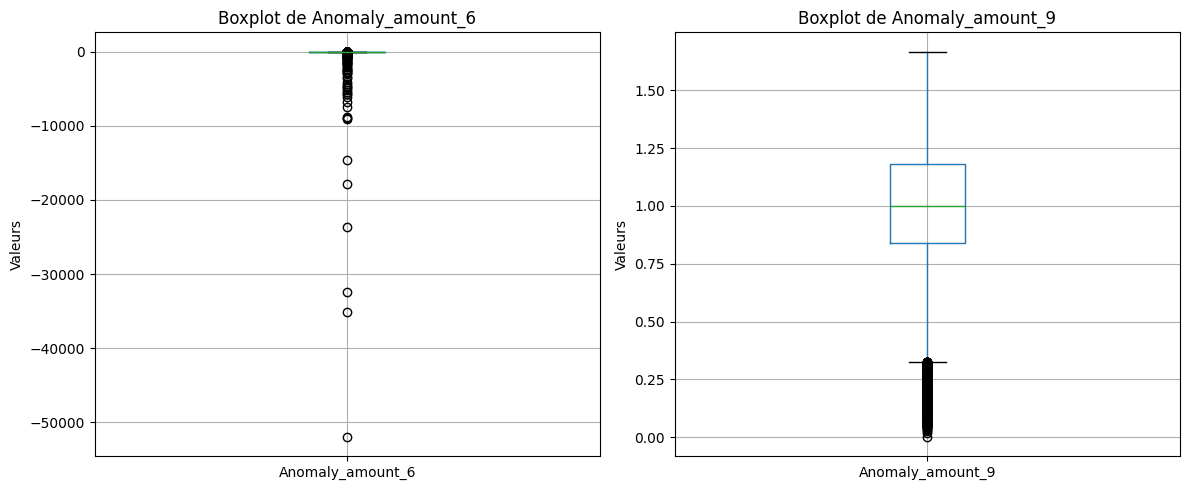

In [369]:
import matplotlib.pyplot as plt
import pandas as pd

# Colonnes à traiter
cols = ["Anomaly_amount_6", "Anomaly_amount_9"]

# Nettoyage : conversion en float (gestion virgules + 'NA')
for col in cols:
    train[col] = train[col].astype(str).str.replace(",", ".").replace("NA", pd.NA)
    train[col] = pd.to_numeric(train[col], errors="coerce")

# Tracer les boxplots séparément
plt.figure(figsize=(12, 5))

for i, col in enumerate(cols):
    plt.subplot(1, 2, i + 1)
    train.boxplot(column=col)
    plt.title(f"Boxplot de {col}")
    plt.ylabel("Valeurs")

plt.tight_layout()
plt.show()


In [370]:
train['Anomaly_amount_6'].isna().sum()/len(train['Anomaly_amount_6'])

np.float64(0.0)

In [371]:
train["ID_CARD"] = pd.to_numeric(train["ID_CARD"], errors="coerce")


In [372]:
test["ID_CARD"] = pd.to_numeric(test["ID_CARD"], errors="coerce")


In [373]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, classification_report


Feature eng


In [374]:
# On trie par carte + date pour bien aligner les historiques
train = train.sort_values(by=["ID_CARD", "DATETIME_GMT"])

# Calcul du temps écoulé depuis la dernière transaction (en secondes)
train["time_since_last_txn"] = train.groupby("ID_CARD")["DATETIME_GMT"].diff().dt.total_seconds()

# Calcul de la différence d'amount depuis la dernière transaction
train["amount_diff_since_last_txn"] = train.groupby("ID_CARD")["AMOUNT"].diff()

train["hour"] = train["DATETIME_GMT"].dt.hour
train["dayofweek"] = train["DATETIME_GMT"].dt.dayofweek
train["is_night"] = train["hour"].apply(lambda h: 1 if h < 6 or h >= 22 else 0)

In [375]:
# On trie par carte + date pour bien aligner les historiques
test = test.sort_values(by=["ID_CARD", "DATETIME_GMT"])

# Calcul du temps écoulé depuis la dernière transaction (en secondes)
test["time_since_last_txn"] = test.groupby("ID_CARD")["DATETIME_GMT"].diff().dt.total_seconds()

# Calcul de la différence d'amount depuis la dernière transaction
test["amount_diff_since_last_txn"] = test.groupby("ID_CARD")["AMOUNT"].diff()

test["hour"] = test["DATETIME_GMT"].dt.hour
test["dayofweek"] = test["DATETIME_GMT"].dt.dayofweek
test["is_night"] = test["hour"].apply(lambda h: 1 if h < 6 or h >= 22 else 0)

In [376]:

# 1. Séparation X / y
X = train.drop(columns=["FLAG_FRAUD","DATETIME_GMT"])
y = train["FLAG_FRAUD"].astype(int)  # au cas où c’est encore un str
weight = (y == 0).sum() / (y == 1).sum()

# Tri du dataset par date croissante
sorted_df = train.sort_values("DATETIME_GMT").reset_index(drop=True)

# Taille du split (20% en test)
split_idx = int(len(sorted_df) * 0.8)

# Séparation manuelle
train_df = sorted_df.iloc[:split_idx]
test_df  = sorted_df.iloc[split_idx:]

# Séparation X / y
X_train = train_df.drop(columns=["FLAG_FRAUD", "DATETIME_GMT"])
y_train = train_df["FLAG_FRAUD"].astype(int)

X_test = test_df.drop(columns=["FLAG_FRAUD", "DATETIME_GMT"])
y_test = test_df["FLAG_FRAUD"].astype(int)


In [377]:
X_train

,ID_TRX,ID_CARD,AMOUNT,Anomaly_amount_1,Anomaly_amount_2,Anomaly_amount_3,Anomaly_amount_4,Anomaly_amount_5,Anomaly_amount_6,Anomaly_amount_7,...,Population_Anomaly_4,Population_Anomaly_5,Population_Anomaly_6,Population_Anomaly_7,Population_Anomaly_8,time_since_last_txn,amount_diff_since_last_txn,hour,dayofweek,is_night
0,196339525,54309097,85.0,-0.352941,-0.576471,-0.715966,-0.753753,-0.746869,0.695126,-0.294118,...,3.671102,3.693230,3.738034,-0.313725,-0.235294,NaN,NaN,0,6,1
1,196339531,37160392,370.0,-1.000000,-0.181622,-0.309009,-0.309009,-0.359459,0.450751,-1.000000,...,-0.660150,-0.669171,-0.668452,0.428829,-0.041081,NaN,NaN,1,6,1
2,196339546,36562573,350.0,-0.434286,-0.577143,-0.611429,-0.703686,-0.468499,0.351243,-0.531429,...,-0.640730,-0.650266,-0.649507,-0.321905,-0.481143,NaN,NaN,2,6,1
3,196339729,33066184,68.0,0.102941,0.272059,0.424632,0.314388,0.168108,-0.524624,0.535294,...,0.849182,0.800099,0.804010,-0.303922,0.447059,NaN,NaN,4,6,1
4,196339906,27058062,25.0,-0.200000,5.260000,3.200000,3.187879,2.830435,-2.900000,0.200000,...,4.029774,3.896270,3.906906,0.266667,0.160000,NaN,NaN,4,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63995,199659378,41928277,433.0,-1.000000,-1.000000,-1.000000,-0.196305,-0.043880,0.043880,-1.000000,...,-0.707188,-0.717573,-0.717094,-1.000000,-1.000000,NaN,NaN,7,3,0
63996,199659264,32326207,350.0,-0.754286,-0.734286,-0.263571,-0.353714,-0.335714,0.335714,-1.000000,...,-0.637750,-0.650597,-0.650005,-0.489524,-0.210857,1209120.0,264.0,7,3,0
63997,199659562,56818784,81.0,0.246914,-0.041152,0.092593,0.123457,0.123457,-0.041152,-0.493827,...,0.658819,0.614913,0.615201,-0.329218,-0.271605,522780.0,50.0,7,3,0
63998,199659582,26328646,28.0,-1.000000,0.357143,0.357143,0.357143,0.732143,-1.375000,-1.000000,...,3.528124,3.367536,3.374942,0.238095,0.585714,NaN,NaN,7,3,0


In [ ]:


# 3. Modèle XGBoost
model = XGBClassifier(
    objective="binary:logistic",
    use_label_encoder=False,
    eval_metric="logloss",  # évite warning
    n_estimators=900,
    max_depth=5,
    learning_rate=0.01 ,
    scale_pos_weight=weight,
    subsample = 0.8,
    colsample_bytree = 0.8,
    reg_alpha = 0.1,
    random_state=8gi
)

# 4. Entraînement
model.fit(X_train, y_train)

# 5. Prédictions (avec seuil par défaut = 0.5)
y_pred = model.predict(X_test)

# 6. Évaluation
print(classification_report(y_test, y_pred, digits=4))
print("F1-score:", f1_score(y_test, y_pred))


y_train_pred = model.predict(X_train)

# Évaluation sur train
print("\n=== Performance sur le train set ===")
print(classification_report(y_train, y_train_pred, digits=4))
print("F1-score (train) :", f1_score(y_train, y_train_pred))




c:\Users\moad1\Desktop\Data S challenge Imperial\msc_statistics_data_science_challenge\venv\lib\site-packages\xgboost\training.py:183: UserWarning: [14:41:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0     0.9997    0.9991    0.9994     15972
           1     0.6154    0.8571    0.7164        28

    accuracy                         0.9988     16000
   macro avg     0.8076    0.9281    0.8579     16000
weighted avg     0.9991    0.9988    0.9989     16000

F1-score: 0.7164179104477612

=== Performance sur le train set ===
              precision    recall  f1-score   support

           0     1.0000    0.9998    0.9999     63936
           1     0.8205    1.0000    0.9014        64

    accuracy                         0.9998     64000
   macro avg     0.9103    0.9999    0.9506     64000
weighted avg     0.9998    0.9998    0.9998     64000

F1-score (train) : 0.9014084507042254


In [336]:
# 3. Modèle XGBoost
model = XGBClassifier(
    objective="binary:logistic",
    use_label_encoder=False,
    eval_metric="logloss",  # évite warning
    n_estimators=1000,
    max_depth=5,
    learning_rate=0.01 ,
    scale_pos_weight=weight,
    random_state=4
)

# 4. Entraînement
model.fit(X_train, y_train)

# 5. Prédictions (avec seuil par défaut = 0.5)
y_pred = model.predict(X_test)

# 6. Évaluation
print(classification_report(y_test, y_pred, digits=4))
print("F1-score:", f1_score(y_test, y_pred))


y_train_pred = model.predict(X_train)

# Évaluation sur train
print("\n=== Performance sur le train set ===")
print(classification_report(y_train, y_train_pred, digits=4))
print("F1-score (train) :", f1_score(y_train, y_train_pred))




c:\Users\moad1\Desktop\Data S challenge Imperial\msc_statistics_data_science_challenge\venv\lib\site-packages\xgboost\training.py:183: UserWarning: [14:33:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0     0.9997    0.9991    0.9994     15972
           1     0.6316    0.8571    0.7273        28

    accuracy                         0.9989     16000
   macro avg     0.8157    0.9281    0.8634     16000
weighted avg     0.9991    0.9989    0.9990     16000

F1-score: 0.7272727272727273

=== Performance sur le train set ===
              precision    recall  f1-score   support

           0     1.0000    0.9999    1.0000     63936
           1     0.9412    1.0000    0.9697        64

    accuracy                         0.9999     64000
   macro avg     0.9706    1.0000    0.9848     64000
weighted avg     0.9999    0.9999    0.9999     64000

F1-score (train) : 0.9696969696969697


In [337]:
X_train = train.drop(columns=["FLAG_FRAUD", "DATETIME_GMT"])
y_train = train["FLAG_FRAUD"].astype(int)

In [338]:
X_test = test.drop(columns=["DATETIME_GMT"])  # ou garde-la si tu l’as encodée


In [339]:
weight = (y_train == 0).sum() / (y_train == 1).sum()

In [340]:
from xgboost import XGBClassifier

final_model = XGBClassifier(
    objective="binary:logistic",
    use_label_encoder=False,
    eval_metric="logloss",  # évite warning
    n_estimators=1000,
    max_depth=6,
    learning_rate=0.01 ,
    scale_pos_weight=weight,
    subsample = 0.8,
    colsample_bytree = 0.8,
    reg_alpha = 0.1,
    random_state=8
)

final_model.fit(X_train, y_train)


c:\Users\moad1\Desktop\Data S challenge Imperial\msc_statistics_data_science_challenge\venv\lib\site-packages\xgboost\training.py:183: UserWarning: [14:33:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [341]:
y_train_pred = final_model.predict(X_train)
print("\n=== Performance sur le TRAIN set ===")
print(classification_report(y_train, y_train_pred, digits=4))
print("F1-score (train) :", f1_score(y_train, y_train_pred))

# 6. Prédictions sur le test final (avec seuil par défaut = 0.5)
y_test_proba = final_model.predict_proba(X_test)[:, 1]
y_test_pred = (y_test_proba > 0.5).astype(int)





=== Performance sur le TRAIN set ===
              precision    recall  f1-score   support

           0     1.0000    0.9999    0.9999     79908
           1     0.9020    1.0000    0.9485        92

    accuracy                         0.9999     80000
   macro avg     0.9510    0.9999    0.9742     80000
weighted avg     0.9999    0.9999    0.9999     80000

F1-score (train) : 0.9484536082474226


In [342]:
X_test

,ID_TRX,ID_CARD,AMOUNT,Anomaly_amount_1,Anomaly_amount_2,Anomaly_amount_3,Anomaly_amount_4,Anomaly_amount_5,Anomaly_amount_6,Anomaly_amount_7,...,Population_Anomaly_4,Population_Anomaly_5,Population_Anomaly_6,Population_Anomaly_7,Population_Anomaly_8,time_since_last_txn,amount_diff_since_last_txn,hour,dayofweek,is_night
7369,200869990,17467387,15.0,-0.500000,1.895238,2.841026,3.170370,4.109333,-5.213636,12.333333,...,7.254217,6.763287,6.837152,8.222222,4.733333,NaN,NaN,13,4,0
7026,200853531,18018649,58.0,-1.000000,0.206897,0.206897,0.206897,-0.181034,0.181034,-1.000000,...,1.134711,1.007747,1.026850,0.022989,-1.000000,NaN,NaN,10,4,0
8826,200948220,18489176,80.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,...,0.005232,0.010413,0.015824,-1.000000,-1.000000,NaN,NaN,2,5,1
5703,200783343,18780243,99.0,0.555556,-0.208081,0.085859,-0.176136,-0.254930,0.344799,-0.555556,...,0.250639,0.176256,0.187447,0.000000,-0.329293,NaN,NaN,5,4,1
8845,200949029,18780243,130.0,0.184615,-0.396923,-0.173077,-0.372596,-0.432601,0.494130,-0.450000,...,-0.047590,-0.104236,-0.095713,-0.300000,-0.310769,85260.0,31.0,4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9935,201007342,62284787,140.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,...,-0.094375,-0.126493,-0.125012,-1.000000,-1.000000,NaN,NaN,10,5,0
10352,201031175,62286115,18.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,...,20.935010,20.792215,21.127550,-1.000000,-1.000000,NaN,NaN,13,5,0
10816,201055818,62287920,100.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,...,2.948302,2.922599,2.982959,-1.000000,-1.000000,NaN,NaN,15,5,0
10335,201029989,62288833,25.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,...,4.374574,4.232319,4.233252,-1.000000,-1.000000,NaN,NaN,13,5,0


In [343]:
y_test_pred

array([0, 0, 0, ..., 0, 0, 0], shape=(11557,))

In [344]:
df_submit = pd.DataFrame({
    'FLAG_FRAUD' : y_test_pred
})

In [345]:
df_submit.to_csv('CrankThatBayH.csv')

In [346]:
df_result_wtih_ID = pd.DataFrame({
    'ID_TRX': X_test['ID_TRX'].values,
    'FLAG_FRAUD': y_test_pred
})


In [347]:
test_original

,ID_TRX,ID_CARD,DATETIME_GMT,AMOUNT,Anomaly_amount_1,Anomaly_amount_2,Anomaly_amount_3,Anomaly_amount_4,Anomaly_amount_5,Anomaly_amount_6,...,FLAG_BEHAVIOUR_Anomaly_8,Anomaly_amount_9,Population_Anomaly_1,Population_Anomaly_2,Population_Anomaly_3,Population_Anomaly_4,Population_Anomaly_5,Population_Anomaly_6,Population_Anomaly_7,Population_Anomaly_8
1,200492121,30486544,2023-10-17 11:35:00,350.0,-0.285714,-0.410714,-0.464286,-0.459184,-0.407143,0.403061,...,0,1.205674,-1.000000,-0.644880,-0.628587,-0.637750,-0.650597,-0.650005,-0.190476,-0.328571
2,200492138,51204390,2023-10-17 11:35:00,33.0,0.323232,1.359307,1.359307,0.979798,0.903030,-0.573803,...,0,0.938124,0.573803,2.766422,2.939225,2.842045,2.705788,2.712072,-0.050505,0.012121
3,200492221,60321087,2023-10-17 11:36:00,300.0,-1.000000,2.333333,2.333333,2.333333,2.333333,-2.329983,...,0,NaN,-1.000000,0.254489,0.330933,0.316101,0.307533,0.327653,-1.000000,-1.000000
4,200492248,32008209,2023-10-17 11:36:00,50.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,...,0,NaN,-1.000000,1.485838,1.599888,1.535750,1.445820,1.449967,-1.000000,-1.000000
5,200492256,37927102,2023-10-17 11:36:00,56.6,2.922261,2.922261,2.922261,0.305212,0.383324,-0.454653,...,0,1.240983,-1.000000,1.195970,1.296721,1.240061,1.160619,1.164282,1.097173,0.689929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11553,201093781,50558333,2023-10-21 21:40:00,95.0,-0.821053,-0.809747,-0.806040,-0.805263,-0.780886,0.779863,...,0,0.953453,-0.770175,0.365989,0.444396,0.414362,0.376926,0.377172,-0.554386,-0.532632
11554,201093809,31868862,2023-10-21 21:47:00,360.0,-1.000000,-1.000000,-0.541667,-0.589236,-0.604012,0.623291,...,0,1.161616,-1.000000,-0.629559,-0.601079,-0.612934,-0.627143,-0.627191,-0.361111,-0.450000
11555,201093877,49895393,2023-10-21 22:21:00,52.0,-1.000000,0.544872,0.072115,0.071006,0.165992,-0.397436,...,0,1.168317,0.392573,1.390229,1.499893,1.438221,1.351750,1.355738,1.269231,0.942308
11556,201093880,52073476,2023-10-21 22:21:00,29.0,-0.536050,0.009828,-0.261835,-0.265681,-0.230279,0.219606,...,0,0.971014,0.274877,3.474790,3.731644,3.633253,3.510620,3.511424,-0.229885,-0.206897


In [348]:
df_result_wtih_ID

,ID_TRX,FLAG_FRAUD
0,200869990,0
1,200853531,0
2,200948220,0
3,200783343,0
4,200949029,0
...,...,...
11552,201007342,0
11553,201031175,0
11554,201055818,0
11555,201029989,0


In [349]:
df_result_sorted = df_result_wtih_ID.set_index('ID_TRX').loc[test_original['ID_TRX']].reset_index()


In [350]:
df_result_sorted['FLAG_FRAUD']

0        0
1        0
2        0
3        0
4        0
        ..
11552    0
11553    0
11554    0
11555    0
11556    0
Name: FLAG_FRAUD, Length: 11557, dtype: int64

In [351]:
df_result_sorted['FLAG_FRAUD'].to_csv('CrankThatBayH_sorted_correctly_1.csv')

In [353]:
df_submit['FLAG_FRAUD'].sum()/len(df_submit['FLAG_FRAUD'])

np.float64(0.0028554123042312017)

In [354]:
y_train.mean()

np.float64(0.00115)